In [1]:
from integrators import contact as ic
from integrators.common import rk4
from lienard import integrator as li
from lienard import models as lm

def step6(system, dt, p, q, s, t, a=ic.a_six, stepper=li.step1):
    return ic.step6(system, dt, p, q, s, t, a=a, stepper=stepper)

def step6b(system, dt, p, q, s, t, a=ic.a_six, stepper=li.step1b):
    return ic.step6(system, dt, p, q, s, t, a=a, stepper=stepper)

def step6e(system, dt, p, q, s, t, a=ic.e_six, stepper=li.step1):
    return ic.step6(system, dt, p, q, s, t, a=a, stepper=stepper)

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate as si
from mpl_toolkits import mplot3d
import progressbar

In [3]:
def err(x, y):
    return np.maximum.accumulate(np.abs(x-y))

## Fritzhugh - Nagumo model without external current

In [4]:
a,b,c=0.7,0.8,3.0
frinag=lm.FritzhughNagumo(a,b,c)

x0,y0=-0.650,0
q0,p0,s0=x0, 0, frinag.xytos(x0,y0)

In [5]:
tspan = np.arange(0, 500, 0.05) 

sol, sols, _ = ic.integrate(li.step1, frinag, tspan, p0, q0, s0)
solm, solms, _ = ic.integrate(step6, frinag, tspan, p0, q0, s0)
sol1, sol1s, _ = ic.integrate(step6e, frinag, tspan, p0, q0, s0)

In [6]:
def ivp_neu(y, t, a, b,c):
    return [
        c*(y[0] + y[1]-(1.0/3.0)*(y[0])**3),
        -(1/c)*(y[0]-a+b*y[1])
    ]

tspan = np.arange(0, 500, 0.05)

y_init, params = [x0, y0], (a,b,c)
y_odeint, info = si.odeint(ivp_neu, y_init, tspan, params, rtol=1e-13, atol=1e-15, full_output=True)
print("Number of function evaluations: %d, number of Jacobian evaluations: %d" % (info['nfe'][-1], info['nje'][-1]))

Number of function evaluations: 1707, number of Jacobian evaluations: 16


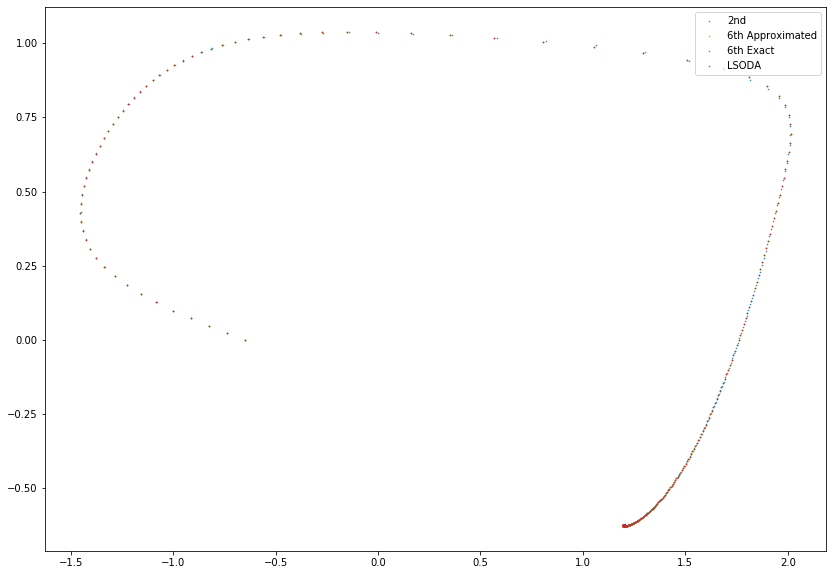

In [7]:
plt.figure(figsize=(14,10))
plt.plot(sol[:,1], frinag.qstoy(sol[:,1],sols[:]), '.',markersize=1,label="2nd")
plt.plot(solm[:,1], frinag.qstoy(solm[:,1],solms[:]),'.',markersize=1,label="6th Approximated")
plt.plot(sol1[:,1], frinag.qstoy(sol1[:,1],sol1s[:]),'.',markersize=1,label="6th Exact")
plt.plot(y_odeint[:, 0], y_odeint[:, 1], '.',markersize=1,label="LSODA")
plt.legend(loc="upper right")
plt.show()

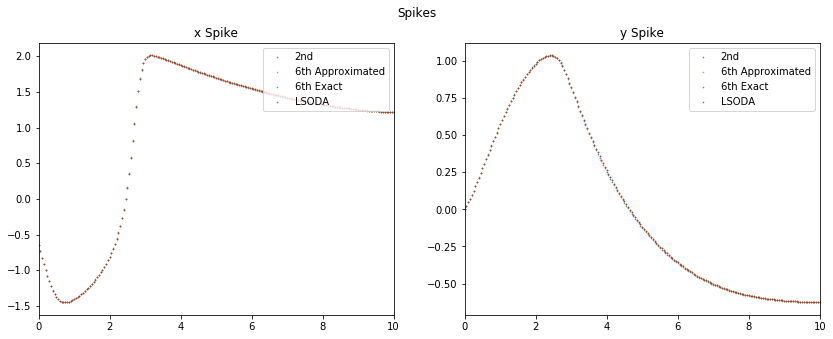

In [8]:
plt.figure(figsize=(14,5))
plt.suptitle("Spikes")
plt.subplot(121)
plt.gca().set_title("x Spike")
plt.plot(tspan, sol[:,1], '.',markersize=1,label="2nd")
plt.plot(tspan, solm[:,1],'.',markersize=1,label="6th Approximated")
plt.plot(tspan, sol1[:,1],'.',markersize=1,label="6th Exact")
plt.plot(tspan, y_odeint[:, 0], '.',markersize=1,label="LSODA")
plt.xlim((0,10))
plt.legend(loc="upper right")

plt.subplot(122)
plt.gca().set_title("y Spike")
plt.plot(tspan, frinag.qstoy(sol[:,1],sols[:]), '.',markersize=1,label="2nd")
plt.plot(tspan, frinag.qstoy(solm[:,1],solms[:]),'.',markersize=1,label="6th Approximated")
plt.plot(tspan, frinag.qstoy(sol1[:,1],sol1s[:]),'.',markersize=1,label="6th Exact")
plt.plot(tspan, y_odeint[:, 1], '.',markersize=1,label="LSODA")
plt.xlim((0,10))
plt.legend(loc="upper right")

plt.show()

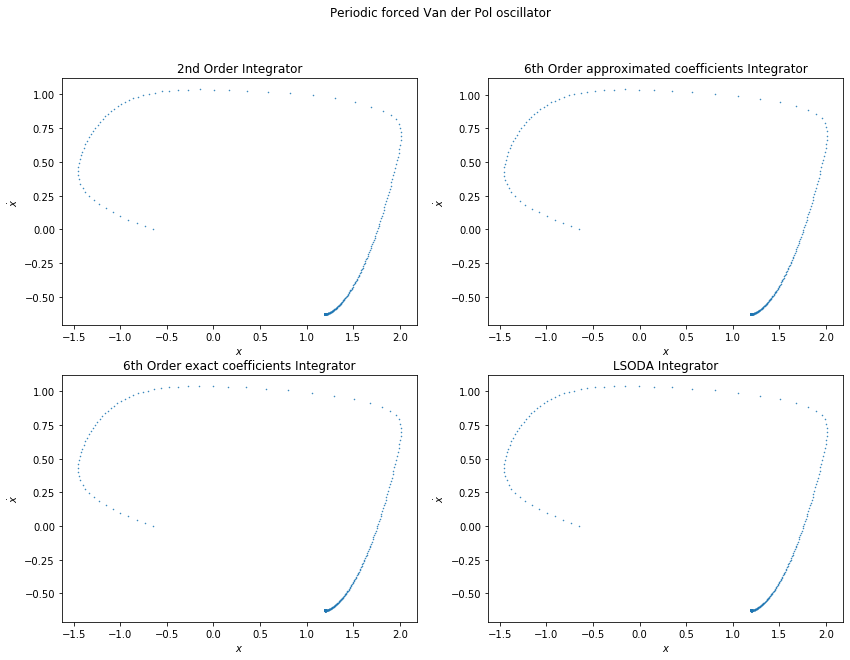

In [9]:
plt.figure(figsize=(14,10))

plt.suptitle("Periodic forced Van der Pol oscillator")
plt.subplot(221)
plt.gca().set_title("2nd Order Integrator")
plt.plot(sol[:,1], frinag.qstoy(sol[:,1],sols[:]), '.',markersize=1)
plt.xlabel("$x$")
plt.ylabel("$\dot{x}$")

plt.subplot(222)
plt.gca().set_title("6th Order approximated coefficients Integrator")
plt.plot(solm[:,1], frinag.qstoy(solm[:,1],solms[:]),'.',markersize=1)
plt.xlabel("$x$")
plt.ylabel("$\dot{x}$")

plt.subplot(223)
plt.gca().set_title("6th Order exact coefficients Integrator")
plt.plot(sol1[:,1], frinag.qstoy(sol1[:,1],sol1s[:]),'.',markersize=1)
plt.xlabel("$x$")
plt.ylabel("$\dot{x}$")

plt.subplot(224)
plt.gca().set_title("LSODA Integrator")
plt.plot(y_odeint[:, 0], y_odeint[:, 1], '.',markersize=1)
plt.xlabel("$x$")
plt.ylabel("$\dot{x}$")

plt.show()

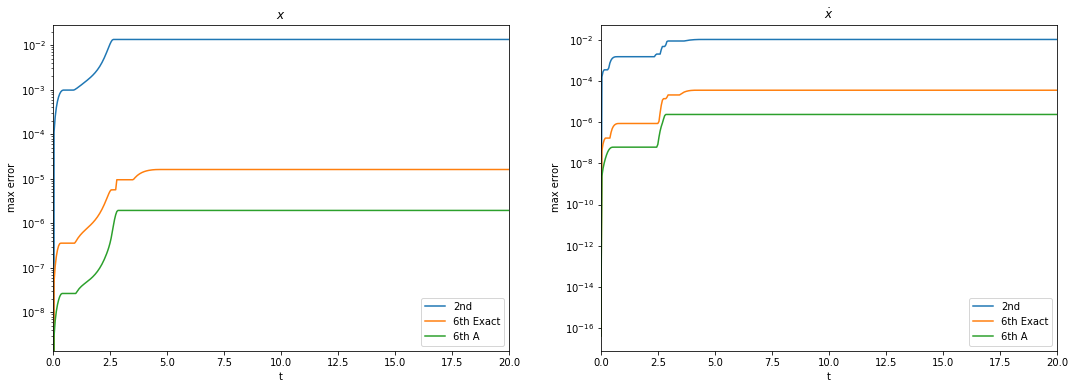

In [10]:
plt.figure(figsize=(18,6))

cut = 0
plt.subplot("121")
plt.title("$x$")
plt.xlabel("t")
plt.ylabel("max error")
plt.plot(tspan,
         err(sol[:,1],y_odeint[:,0]),label='2nd')
plt.plot(tspan,
         err(sol1[:,1],y_odeint[:,0]),label='6th Exact')
plt.plot(tspan,
         err(solm[:,1],y_odeint[:,0]),label='6th A')
plt.yscale('log')
plt.xlim(0,20)
plt.legend(loc='lower right')

plt.subplot("122")
plt.title("$\dot{x}$")
plt.xlabel("t")
plt.ylabel("max error")
plt.plot(tspan,
         err(frinag.qstoy(sol[:,1],sols),y_odeint[:,1]),label="2nd")
plt.plot(tspan,
         err(frinag.qstoy(sol1[:,1],sol1s),y_odeint[:,1]),label="6th Exact")
plt.plot(tspan,
         err(frinag.qstoy(solm[:,1],solms),y_odeint[:,1]),label="6th A")
plt.yscale('log')
plt.xlim(0,20)
plt.legend(loc='lower right')

plt.show()

## Fritzhugh-Nagumo with stimulation

In [11]:
a,b,c,i0=0.7,0.8,3.0,-0.4

def forcing(t):
    return i0*np.heaviside(t,0)-i0*np.heaviside(t-100,0)

frinag=lm.FritzhughNagumo(a,b,c,forcing)

x0,y0=-0.650,0
q0,p0,s0=x0, 0, frinag.xytos(x0,y0,0)

In [12]:
tspan = np.arange(0, 500, 0.05)

sol, sols, _ = ic.integrate(li.step1, frinag, tspan, p0, q0, s0)
solm, solms, _ = ic.integrate(step6, frinag, tspan, p0, q0, s0)
sol1, sol1s, _ = ic.integrate(step6e, frinag, tspan, p0, q0, s0)

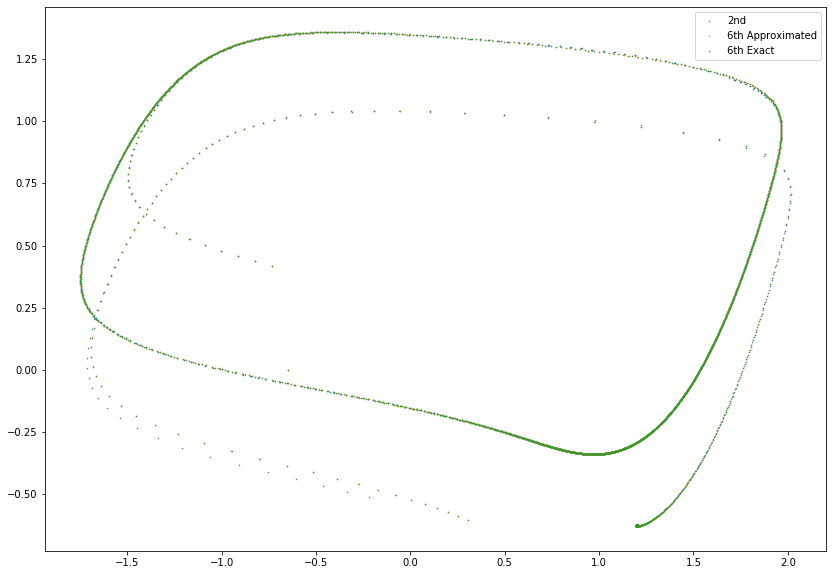

In [13]:
plt.figure(figsize=(14,10))
plt.plot(sol[:,1], (frinag.qstoy(sol[:,1],sols[:],tspan[:])), '.',markersize=1,label="2nd")
plt.plot(solm[:,1], (frinag.qstoy(solm[:,1],solms[:],tspan[:])),'.',markersize=1,label="6th Approximated")
plt.plot(sol1[:,1], (frinag.qstoy(sol1[:,1],sol1s[:],tspan[:])),'.',markersize=1,label="6th Exact")
plt.legend(loc="upper right")
plt.show()

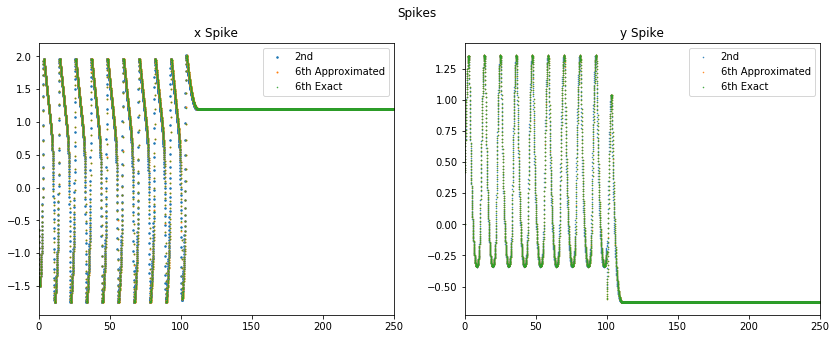

In [14]:
plt.figure(figsize=(14,5))
plt.suptitle("Spikes")
plt.subplot(121)
plt.gca().set_title("x Spike")
plt.plot(tspan, sol[:,1], '.',markersize=3,label="2nd")
plt.plot(tspan, solm[:,1],'.',markersize=2,label="6th Approximated")
plt.plot(tspan, sol1[:,1],'.',markersize=1,label="6th Exact")
plt.xlim((0,250))
plt.legend(loc="upper right")

plt.subplot(122)
plt.gca().set_title("y Spike")
plt.plot(tspan, frinag.qstoy(sol[:,1],sols[:],tspan[:]), '.',markersize=1,label="2nd")
plt.plot(tspan, frinag.qstoy(solm[:,1],solms[:],tspan[:]),'.',markersize=1,label="6th Approximated")
plt.plot(tspan, frinag.qstoy(sol1[:,1],sol1s[:],tspan[:]),'.',markersize=1,label="6th Exact")
plt.xlim((0,250))
plt.legend(loc="upper right")

plt.show()

## Warning

The error control down here is currently meaningless and has to be redone. We cannot compare with 6th Approximated as is. Either we solve it with a **much** smaller time step, or we need to compare with an adaptive integration or some other integrator (With **much** smaller time step).

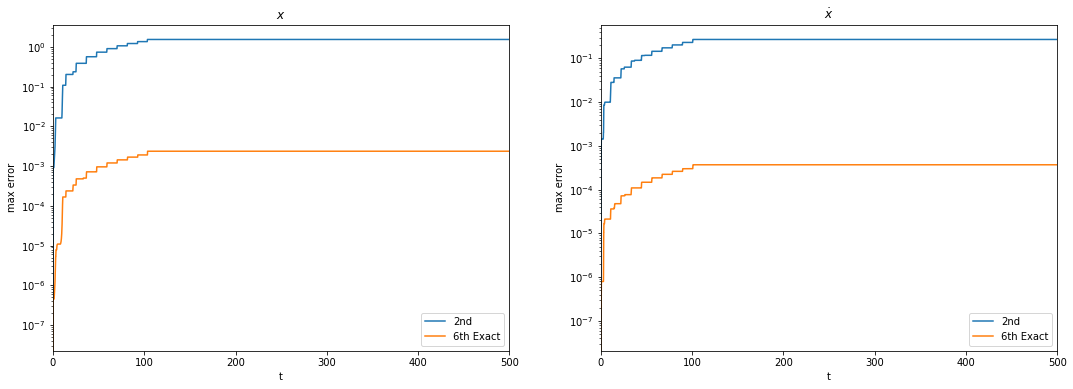

In [15]:
plt.figure(figsize=(18,6))

cut = 0
plt.subplot("121")
plt.title("$x$")
plt.xlabel("t")
plt.ylabel("max error")
plt.plot(tspan,
         err(sol[:,1],solm[:,1]),label='2nd')
plt.plot(tspan,
         err(sol1[:,1],solm[:,1]),label='6th Exact')
plt.yscale('log')
plt.xlim(0,500)
plt.legend(loc='lower right')

plt.subplot("122")
plt.title("$\dot{x}$")
plt.xlabel("t")
plt.ylabel("max error")
plt.plot(tspan,
         err(frinag.qstoy(sol[:,1],sols,tspan),frinag.qstoy(solm[:,1],solms,tspan)),label="2nd")
plt.plot(tspan,
         err(frinag.qstoy(sol1[:,1],sol1s,tspan),frinag.qstoy(solm[:,1],solms,tspan)),label="6th Exact")
plt.yscale('log')
plt.xlim(0,500)
plt.legend(loc='lower right')

plt.show()